**Handwritten Digit Recognition Project**
*   Loading the MNIST Dataset

In [ ]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# TODO: Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# TODO: Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [ ]:
# TODO: Figure out how many images are in the train_set and test_set.
num_train_images = len(train_set)
num_test_images = len(test_set)
print(f"the number of images in the train_set is : {num_train_images}")
print(f"the number of images in the test_set is : {num_test_images}")

the number of images in the train_set is : 60000
the number of images in the test_set is : 10000


Building the Neural Network Model

In [ ]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# TODO: Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO: Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 10) # First fully connected layer
        #self.fc2 = nn.Linear(1024, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)  # TODO: add an activation function
        return x

# Create an instance of the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F
# TODO: Define the neural network class
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        # TODO: Define layers of the neural network
        self.fc1 = nn.Linear(28*28, 1024) # First fully connected layer
        self.fc2 = nn.Linear(1024, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

# Create an instance of the network
model = ComplexNet()
print(model)

ComplexNet(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


Training the Neural Network Model

In [ ]:
# TODO: Complete this code
# Import optimizer
from torch.optim import SGD

# TODO: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# TODO: Set the number of epochs
num_epochs = 50
hist_training_loss = []
hist_test_loss = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete Training pass
        optimizer.zero_grad()

        # compute output
        # compute loss
        outputs = model(images)
        loss = criterion(outputs, labels)

        #execute backword and optimaze
        loss.backward() #Compute Grandients
        optimizer.step() #Adjust the weights

        running_loss += loss.item()
        hist_training_loss.append(running_loss)
    else:
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    # TODO: evaluate on the test_loader
    test_loss = 0.0
    with torch.no_grad():
     for images, labels in test_loader:
        # TODO: Complete evaluation pass
            outputs = model(images)
            tloss = criterion(outputs, labels)

            test_loss += loss.item()

     else:
         print(f" Loss: {test_loss/len(test_loader)}")
         hist_test_loss.append(test_loader)

print("Training is finished!")

Epoch 1, Loss: 0.8991490215507906
 Loss: 0.43052107095718384
Epoch 2, Loss: 0.36328197987094873
 Loss: 0.27053311467170715
Epoch 3, Loss: 0.30858045340632834
 Loss: 0.5897347927093506
Epoch 4, Loss: 0.27543183181013886
 Loss: 0.14713388681411743
Epoch 5, Loss: 0.24941754390372398
 Loss: 0.42356792092323303
Epoch 6, Loss: 0.22530470687999274
 Loss: 0.36445552110671997
Epoch 7, Loss: 0.2038497541909978
 Loss: 0.2702961266040802
Epoch 8, Loss: 0.18527632930290217
 Loss: 0.21242643892765045
Epoch 9, Loss: 0.1686818336071109
 Loss: 0.12029032409191132
Epoch 10, Loss: 0.1548410837691444
 Loss: 0.025899788364768028
Epoch 11, Loss: 0.14269546409254708
 Loss: 0.14279554784297943
Epoch 12, Loss: 0.13176265165114454
 Loss: 0.05459611117839813
Epoch 13, Loss: 0.1218642116591795
 Loss: 0.03464925289154053
Epoch 14, Loss: 0.11382034674350387
 Loss: 0.07225623726844788
Epoch 15, Loss: 0.1064557311540124
 Loss: 0.08335117995738983
Epoch 16, Loss: 0.09931161255240123
 Loss: 0.03361031413078308
Epoch 17

ValueError: ignored

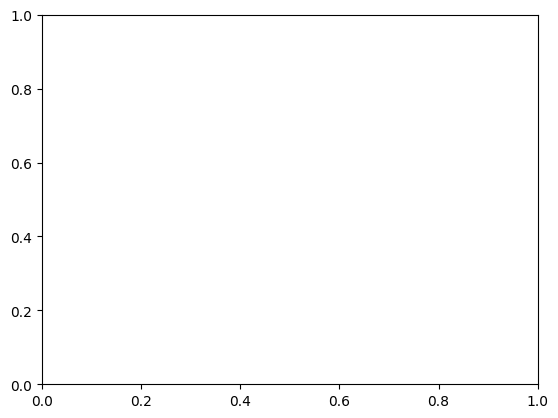

In [ ]:
# TODO: plot the model complexity graph
import matplotlib.pyplot as plt
import numpy as np
epoch_list = np.arange(50)
plt.plot(epoch_list, hist_training_loss, label='Training loss')
plt.plot(epoch_list, hist_test_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.title('Training and Test Losses')
plt.show()

## Implementing Early Stopping 🛑

In [ ]:
# TODO: Complete this code
# Import optimizer
from torch.optim import SGD

# TODO: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# TODO: Set the number of epochs
num_epochs = 50

hist_training_loss = []
hist_test_loss = []
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete Training pass
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward() # computes gradients
        optimizer.step() # adjust the weights

        running_loss += loss.item()

    else:
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
    hist_training_loss.append(running_loss)
    # TODO: evaluate on the test_loader
    test_loss = 0.0
    with torch.no_grad(): # don't compute any gradients
      for images, labels in test_loader:
          # TODO: Complete evaluation pass
          outputs = model(images)
          tloss = criterion(outputs, labels)

          test_loss += tloss.item()

      else:
          print(f" Loss: {test_loss/len(test_loader)}")
      hist_test_loss.append(test_loss)

print("Training is finished!")

Epoch 1, Loss: 0.017055021750970064
 Loss: 0.0638396362569235
Epoch 2, Loss: 0.01622227756503864
 Loss: 0.06626679809238675
Epoch 3, Loss: 0.015556501333853964
 Loss: 0.06317579306917528
Epoch 4, Loss: 0.014749840231808916
 Loss: 0.06601695810254829
Epoch 5, Loss: 0.014361883827690174
 Loss: 0.06419447942941478
Epoch 6, Loss: 0.013639181372220577
 Loss: 0.06453421075548828
Epoch 7, Loss: 0.013237565001502617
 Loss: 0.06350397682130696
Epoch 8, Loss: 0.012618503551051489
 Loss: 0.06763139609582974
Epoch 9, Loss: 0.012094458195205623
 Loss: 0.06453402562824724
Epoch 10, Loss: 0.01148361233647601
 Loss: 0.06533663095114826
Epoch 11, Loss: 0.01100310816048289
 Loss: 0.06497710114119724
Epoch 12, Loss: 0.010598380873353332
 Loss: 0.06573755175880361
Epoch 13, Loss: 0.010100149514234519
 Loss: 0.06962684306060632
Epoch 14, Loss: 0.00983679877339191
 Loss: 0.06418518693171327
Epoch 15, Loss: 0.009384668360316336
 Loss: 0.06752367016071881
Epoch 16, Loss: 0.009034954617718366
 Loss: 0.06499650

 **Implementing Early Stopping**

In [ ]:
# TODO: Complete this code to implement Early stopping
patience = 5
min_delta = 0.01
best_loss = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Training pass

        running_loss += loss.item()

    # evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            validation_loss += loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    validation_loss /= len(test_loader)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

Epoch 1, Training Loss: 0.0012245563557371497, Validation Loss: 0.0012245563557371497
Epoch 2, Training Loss: 0.0012245563557371497, Validation Loss: 0.0012245563557371497
Epoch 3, Training Loss: 0.0012245563557371497, Validation Loss: 0.0012245563557371497
Epoch 4, Training Loss: 0.0012245563557371497, Validation Loss: 0.0012245563557371497
Epoch 5, Training Loss: 0.0012245563557371497, Validation Loss: 0.0012245563557371497
Epoch 6, Training Loss: 0.0012245563557371497, Validation Loss: 0.0012245563557371497
Early stopping triggered!
Training is finished!


Experimenting with Dropout

In [ ]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout()  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout()  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# TODO: Train the dropout model
# What do you notice ?